This Notebook is used for 

# Google Drive Auth

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from googleapiclient.http import MediaIoBaseDownload

In [ ]:
# Authenticate and create a drive service
auth.authenticate_user()
service = build('drive', 'v3')

# Data Upload

In [ ]:

from datetime import datetime
import numpy as np
import pandas as pd
import os

In [ ]:
ori_file_path = '/content/drive/MyDrive/Colab Notebooks/Data Science/starbucks_location/static'
ori_file_name = 'directory.csv'
data = pd.read_csv(f'{ori_file_path}/{ori_file_name}')


# Data Processing

In [ ]:
# Show data
data.head()

In [ ]:
# Check data
data.describe()

In [ ]:
# Show general info
data.info()

In [ ]:
# Show unique Brand
data['Brand'].unique()

In [ ]:
# Only consider band 'Starbucks'
data = data[data['Brand'] == 'Starbucks']
data.info()

In [ ]:
# Count rows with missing value
data.isnull().sum()

In [ ]:
# Show rows without 'City'
data[data['City'].isnull()]

In [ ]:
# populate null 'City' with 'State/Province'
data['City'] = data['City'].fillna(data['State/Province'])

In [ ]:
# Show top 10 numbers of Starbucks store by countries
data['Country'].value_counts()[0:10]

US    13311
CN     2734
CA     1415
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Configuring Chinese decoding
plt.rcParams['font.sans-serif'] = ['SimHei']
# Configuring symbol '-'(minus) decoding
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline


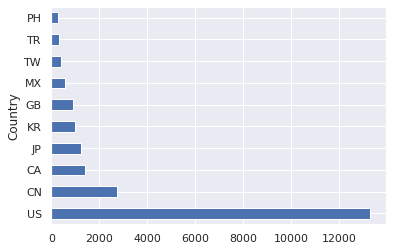

In [ ]:
# Show top 10 Countries which has Starbucks stores
country_count = data.value_counts('Country')[0:10]
country_count.plot(kind='barh')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_

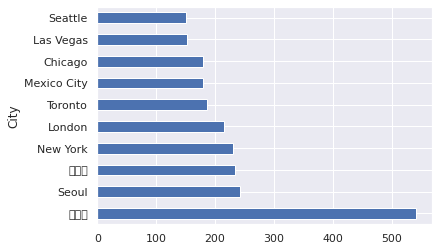

In [ ]:
# Show top 10 Cities which has Starbucks stores
city_count = data.value_counts('City')[0:10]
city_count.plot(kind='barh')

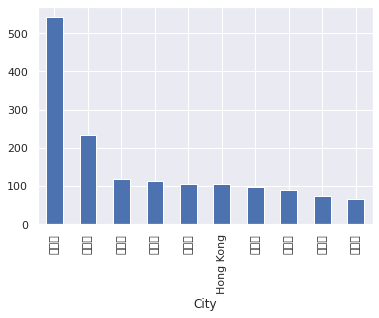

In [ ]:
# Show top 10 Cities of China which has Starbucks stores
china_data = data[data['Country'] == 'CN']
china_city_count = china_data.value_counts('City')[0:10]
china_city_count.plot(kind='bar')

# Data Download

In [ ]:
# directory
des_file_path = '/content/drive/MyDrive/Colab Notebooks/Data Science/starbucks_location'
des_file_name = 'ans.xlsx'


In [ ]:

writer = pd.ExcelWriter(f'{des_file_path}/{des_file_name}')

country_count.to_excel(writer, sheet_name='Top10 Country')
city_count.to_excel(writer, sheet_name='Top10 City')
china_city_count.to_excel(writer, sheet_name='Top10 China City')

writer.save()